In [2]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np 

%matplotlib inline 

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print("Train:", len(X_train))
print("Test:", len(X_test))

Train: 60000
Test: 10000


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

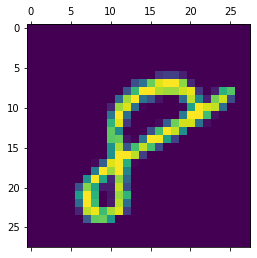

In [9]:
plt.matshow(X_train[-1])b

In [15]:
X_train = X_train / 255
X_test = X_test / 255

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape

(60000, 784)

In [16]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4723 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9256


In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2664 - accuracy: 0.9259


[0.2663549482822418, 0.9258999824523926]

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([4.6157613e-01, 6.4511299e-03, 9.9955696e-01, 3.4887868e-01,
       8.4189589e-10, 8.2659554e-01, 8.8455653e-01, 1.2377776e-12,
       2.5002676e-01, 2.8284999e-09], dtype=float32)

In [20]:
np.argmax(y_predicted[1])

2

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted:', y_predicted_labels[:10])
print('True values:', list(y_test[:10]))

Predicted: [7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
True values: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [34]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'True')

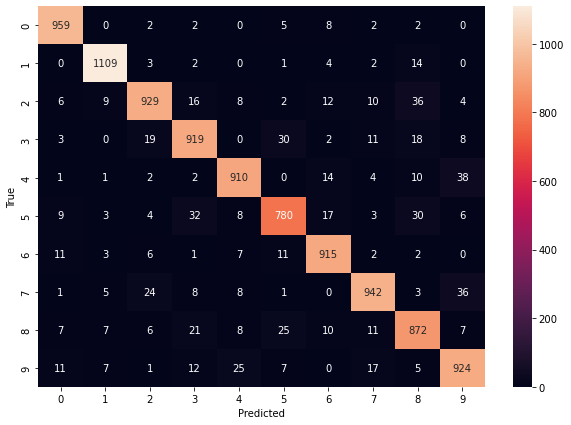

In [35]:
import seaborn as sns 

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [42]:
#Adcionando uma camada oculta ao modelo 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Adcionando flatten, dispensa divisão
    keras.layers.Dense(100, activation='relu'),#Camada oculta, 100 
    keras.layers.Dense(10, activation='sigmoid') #Saída 
])
###Quando flatten adcionado, dispensa o parametro input_shape na entrada 

model.compile(
    optimizer='adam', #Otimizador 
    loss='sparse_categorical_crossentropy', #Função de perca 
    metrics=['accuracy'] #Métrica de avaliação 
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1222 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0841 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9841


In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9749


[0.07970619201660156, 0.9749000072479248]

Text(69.0, 0.5, 'True')

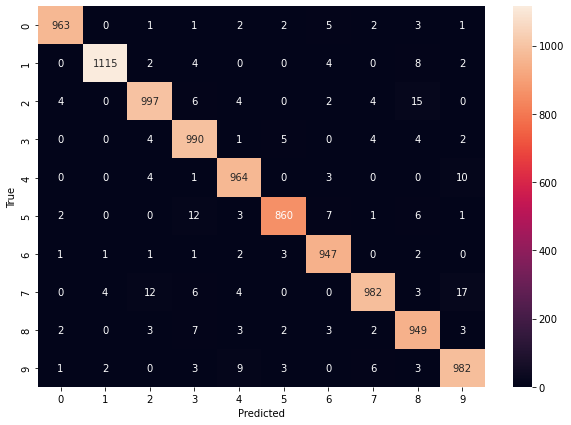

In [46]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')